In [108]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

## Reading the data, and cleaning up missing values

In [109]:
col_names = ["id", "clump_thickness", "un_cell_size", "un_cell_shape", "marginal_adheshion", "single_eph_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]
data = pd.read_csv('./data.csv', names = col_names, header = None)

In [110]:
data.head()

,id,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [111]:
data.drop('id', inplace = True, axis = 1)

In [112]:
data.head()

,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   clump_thickness       699 non-null    int64 
 1   un_cell_size          699 non-null    int64 
 2   un_cell_shape         699 non-null    int64 
 3   marginal_adheshion    699 non-null    int64 
 4   single_eph_cell_size  699 non-null    int64 
 5   bare_nuclei           699 non-null    object
 6   bland_chromatin       699 non-null    int64 
 7   normal_nucleoli       699 non-null    int64 
 8   mitoses               699 non-null    int64 
 9   class                 699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [114]:
data["bare_nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [115]:
data = data[data["bare_nuclei"] != '?' ]
data.bare_nuclei = pd.to_numeric(data.bare_nuclei)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   clump_thickness       683 non-null    int64
 1   un_cell_size          683 non-null    int64
 2   un_cell_shape         683 non-null    int64
 3   marginal_adheshion    683 non-null    int64
 4   single_eph_cell_size  683 non-null    int64
 5   bare_nuclei           683 non-null    int64
 6   bland_chromatin       683 non-null    int64
 7   normal_nucleoli       683 non-null    int64
 8   mitoses               683 non-null    int64
 9   class                 683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


## Data preprocessing

In [117]:
data = data.sample(frac = 1)

In [118]:
X = data.drop('class', axis = 1)
y = data['class']

In [119]:
data_stats = X.describe().transpose()

In [120]:
def norm(df):
    return (df - data_stats['mean']) / data_stats['std']

In [121]:
X = norm(X)

In [122]:
X.describe()

,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
count,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02
mean,1.144359e-16,1.170367e-17,-7.152242e-17,5.461712e-17,-1.820571e-17,1.300408e-18,3.316039e-17,4.291345e-17,5.981875e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.220297e+00,-7.016978e-01,-7.412304e-01,-6.388973e-01,-1.005027e+00,-6.983413e-01,-9.981216e-01,-6.124785e-01,-3.481446e-01
25%,-8.657829e-01,-7.016978e-01,-7.412304e-01,-6.388973e-01,-5.552016e-01,-6.983413e-01,-5.899078e-01,-6.124785e-01,-3.481446e-01
50%,-1.567545e-01,-7.016978e-01,-7.412304e-01,-6.388973e-01,-5.552016e-01,-6.983413e-01,-1.816940e-01,-6.124785e-01,-3.481446e-01
75%,5.522740e-01,6.032977e-01,5.971975e-01,4.083832e-01,3.444489e-01,6.738310e-01,6.347336e-01,3.702689e-01,-3.481446e-01
max,1.970331e+00,2.234542e+00,2.270232e+00,2.502944e+00,3.043400e+00,1.771569e+00,2.675803e+00,2.335764e+00,4.846139e+00


In [123]:
y.unique()

array([2, 4], dtype=int64)

In [124]:
y = np.where(y == 2, 0, 1)

In [125]:
X_train, X_test, y_train, y_test = X[:int(len(data)*0.8)], X[int(len(data)*0.8):], y[:int(len(data)*0.8)], y[int(len(data)*0.8):]

In [126]:
X_train.shape

(546, 9)

In [127]:
y_train.shape

(546,)

## Building a model from scratch

The model will be of the following architecture:

* Input Layer
* Dense(128) with relu activation
* Dropout of 0.3
* Dense(1) with sigmoid activation

<br>
There are 3 ways of building a keras model:

* tf.keras.models.Sequential
* tf.keras.models.Model
* Custom models inheriting from Model class

#### Sequential Models

In [128]:
model_seq = tf.keras.models.Sequential(
    [
        Dense(128, activation = 'relu'),
        Dropout(0.3),
        Dense(1, activation = 'sigmoid'),
    ]
)

In [129]:
model_seq.compile(metrics = ['accuracy'],
             optimizer = 'adam',
             loss = tf.keras.losses.BinaryCrossentropy())

#### tf.keras.models.Model

In [130]:
input_layer = Input(shape=(9))
x = Dense(128, activation = 'relu')(input_layer)
x = Dropout(0.4)(x)
x = Dense(128, activation = 'relu')(x)
output_layer = Dense(1, activation = 'sigmoid')(x)

In [131]:
model = Model(inputs = [input_layer], outputs = output_layer)
model.compile(
    metrics = ['accuracy'],
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam()
)

#### Model class for Custom Models

In [132]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Dense, Dropout, Input
from tensorflow.keras.utils import plot_model

In [133]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc_1 = Dense(128, activation = 'relu')
        self.output_ = Dense(1, activation = 'sigmoid')
        self.dropout = Dropout(0.3)
    
    def call(self, inputs):
        x = self.fc_1(inputs)
        x = self.dropout(x)

        return self.output_(x)

In [134]:
input_layer = Input(shape = (9))
output_layer = MyModel()(input_layer)

model = Model(inputs = input_layer, outputs = output_layer)

In [135]:
model.compile(
    metrics = ['accuracy'],
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam()
)

In [136]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
18/18 [==============================] - 1s 14ms/step - loss: 0.5907 - accuracy: 0.7656 - val_loss: 0.3754 - val_accuracy: 0.9416
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 0.3181 - accuracy: 0.9742 - val_loss: 0.2449 - val_accuracy: 0.9416
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.1776 - accuracy: 0.9844 - val_loss: 0.1864 - val_accuracy: 0.9416
Epoch 4/10
18/18 [==============================] - 0s 7ms/step - loss: 0.1270 - accuracy: 0.9752 - val_loss: 0.1598 - val_accuracy: 0.9416
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.1011 - accuracy: 0.9787 - val_loss: 0.1466 - val_accuracy: 0.9416
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0772 - accuracy: 0.9835 - val_loss: 0.1412 - val_accuracy: 0.9416
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0733 - accuracy: 0.9794 - val_loss: 0.1381 - val_accuracy: 0.9416
Epoch 8/10
18/18 [=

## Building the Layers from scratch

Here we will be building a Dense Layer / fully connected layer and a Dropout Layer from scratch

In [137]:
class MyDense(Layer):
    def __init__(self, units, activation = None):
        super(MyDense, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, input_shape):
        
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            name = 'kernel',
            initial_value = w_init(shape = (input_shape[-1], self.units), dtype = 'float32'),
            trainable = True
        )
        
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            name = 'bias',
            initial_value = b_init(shape = (self.units,), dtype = 'float32'),
            trainable = True
        )
        super().build(input_shape)
        
    def call(self, inputs):
        return self.activation(tf.add(tf.matmul(inputs, self.w), self.b))

In [138]:
class MyDropout(Layer):
    def __init__(self, drop_pct = 0.0):
        super(MyDropout, self).__init__()
        self.drop_pct = drop_pct
        
    def build(self, input_shape):
        zeros_tensor = tf.zeros(shape = (int(input_shape[-1] * self.drop_pct), ))
        ones_tensor = tf.ones(shape = (input_shape[-1] - int(input_shape[-1] * self.drop_pct), ))
        self.drop_matrix = tf.Variable(
            name = 'Dropout Matrix',
            initial_value = tf.concat([zeros_tensor, ones_tensor], 0),
            trainable = False)
        
        super().build(input_shape)
    
    def call(self, inputs):
        return inputs * tf.random.shuffle(self.drop_matrix)

In [151]:
input_layer = Input(shape=(9))
x = MyDense(128, activation = 'relu')(input_layer)
x = MyDropout(0.4)(x)
x = MyDense(128, activation = 'relu')(x)
output_layer = MyDense(1, activation = 'sigmoid')(x)

In [140]:
model = Model(inputs = [input_layer], outputs = output_layer)

In [141]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
my_dense_6 (MyDense)         (None, 128)               1280      
_________________________________________________________________
my_dropout_2 (MyDropout)     (None, 128)               128       
_________________________________________________________________
my_dense_7 (MyDense)         (None, 128)               16512     
_________________________________________________________________
my_dense_8 (MyDense)         (None, 1)                 129       
Total params: 18,049
Trainable params: 17,921
Non-trainable params: 128
_________________________________________________________________


In [142]:
model.compile(
    metrics = ['accuracy'],
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam())

In [143]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
18/18 [==============================] - 1s 15ms/step - loss: 0.6722 - accuracy: 0.8183 - val_loss: 0.5916 - val_accuracy: 0.9343
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 0.5227 - accuracy: 0.9846 - val_loss: 0.3739 - val_accuracy: 0.9343
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.2658 - accuracy: 0.9828 - val_loss: 0.1960 - val_accuracy: 0.9343
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.1163 - accuracy: 0.9745 - val_loss: 0.1534 - val_accuracy: 0.9343
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.9714 - val_loss: 0.1414 - val_accuracy: 0.9343
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0671 - accuracy: 0.9759 - val_loss: 0.1395 - val_accuracy: 0.9343
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0649 - accuracy: 0.9758 - val_loss: 0.1373 - val_accuracy: 0.9343
Epoch 8/10
18/18 [=

### Testing your model

In [152]:
X_test.shape

(137, 9)

In [156]:
y_preds = model.predict(X_test)
y_preds = np.array([1 if x >= 0.5 else 0 for x in y_preds ])

In [157]:
y_preds

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0])

In [158]:
y_test

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0])

In [165]:
accuracy = sum(
    [1 
     if (y_preds[i] == y_test[i])
     else 0 
     for i in range(len(y_preds))
    ]) / len(y_preds)

In [167]:
accuracy * 100

93.43065693430657

## MNIST

In [221]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten

In [222]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [223]:
x_train.shape

(60000, 28, 28)

In [224]:
y_train[0]

5

In [225]:
y_train.shape

(60000,)

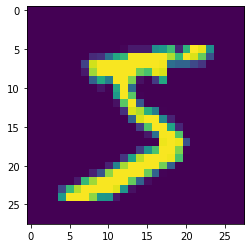

In [226]:
plt.imshow(x_train[0].reshape((28, 28, 1)))

In [227]:
def encoding(x):
    val = [0 for i in range(10)]
    val[x] = 1
    return np.reshape(np.array(val), (-1))

In [228]:
y_train = np.array(list(map(encoding, y_train)))
y_test = np.array(list(map(encoding, y_test)))

In [229]:
y_train.shape

(60000, 10)

In [230]:
y_test.shape

(10000, 10)

In [231]:
model = tf.keras.models.Sequential(
    [
        Input(shape = (28, 28)),
        Flatten(),
        Dense(128, activation = 'relu'),
        Dropout(0.3),
        Dense(10, activation = 'sigmoid'),
    ]
)

In [232]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy'],
)

In [233]:
model.fit(x_train, y_train, epochs = 1, validation_data = (x_test, y_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 8.1781 - accuracy: 0.6551 - val_loss: 0.5829 - val_accuracy: 0.8686


In [234]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


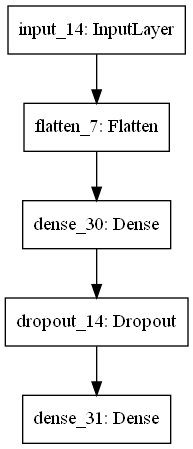

In [235]:
tf.keras.utils.plot_model(model)

In [236]:
x_test.shape

(10000, 28, 28)

In [237]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [238]:
y_preds = model.predict(x_test)

In [239]:
y_preds = np.array([np.argmax(i) for i in y_preds])

In [240]:
y_test = np.array([np.argmax(i) for i in y_test])

In [241]:
accuracy = sum(
    [1 
     if (y_preds[i] == y_test[i])
     else 0 
     for i in range(len(y_preds))
    ]) / len(y_preds)

In [242]:
accuracy * 100

61.36000000000001